In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import acnet_reader.acnet_reader as ar
import os
from config_ursse import get_path_from_config
images_dir = os.path.join(get_path_from_config("URSSE_sync_motion_note_dir"),
                          "images")

In [2]:
t1 = datetime(2021, 5, 26, 20, 59, 0, 0)
t2 = datetime(2021, 5, 26, 21, 50, 0, 0)

In [10]:
df = ar.fetch_data_one_device(t1, t2, "N:ITP4RC")
singlePhotonCountRate = df['2021-05-26 21:27:00.000000': '2021-05-26 21:41:00.000000']['N:ITP4RC'].mean()

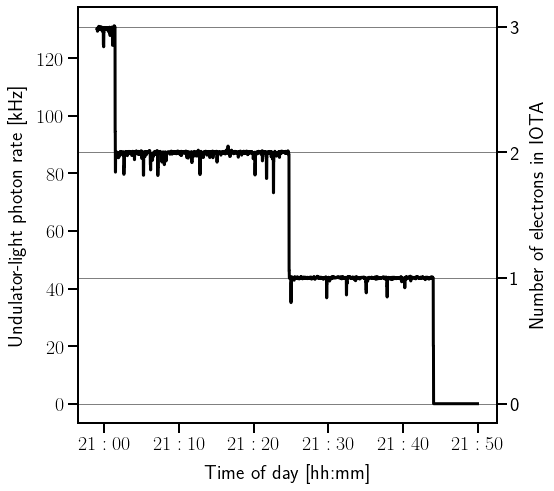

In [54]:
from ursse.path_assistant import get_plot_style_sheet
plt.style.use(get_plot_style_sheet("countrate"))
# plt.rc('text.latex', preamble=
#        r'\usepackage{siunitx}')
fig, ax = plt.subplots(figsize=(7.5, 7.65))
ax.plot(df.index, 1e-3 * df['N:ITP4RC'], color='black')
count_rates = 1e-3 * singlePhotonCountRate * np.arange(4)
for h in count_rates:
    ax.axhline(h, color='gray', linewidth=1, zorder=0)
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
ax1.set_yticks(count_rates)
ax1.set_yticklabels(np.arange(4))
ax1.set_ylabel("Number of electrons in IOTA", labelpad=10)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M"))
ax.set_ylabel(r'Undulator-light photon rate [kHz]', labelpad=10)
ax.set_xlabel(r'Time of day [hh:mm]', labelpad=10)

fig.savefig(os.path.join(images_dir,
                             "3_last_electrons.png"),
            dpi=300, bbox_inches='tight')

plt.show()